##The Sparks Foundation - GRIP - Data Science and Business Analytics(April'22)

#Task : 3 Exploratory Data Analysis - Retail

#By Imen Selmi

Dataset :https://bit.ly/3i4rbWl

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Librairies

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data summurizing visualisation

In [61]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ The Sparks Foundation/task3/SampleSuperstore.csv')

In [62]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [63]:
data.shape

(9994, 13)

We have 13 columns and 9994 rows .

In [64]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We don't have any missing data

In [65]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


We can see there are : <br>

2 Integer type features <br>
3 Float type features.<br>
8 Object type features.<br>
So, we have to encode those categorical features as we can feed only numerical features into the machine learning model.<br>


## Encoding <br>
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number. <br>

Label Encoding <br>
One hot encoding <br>
Dummy variable trap <br>
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them. <br>

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1. <br>

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others. <br>

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy. <br>

In [67]:
data1=data.drop(columns='Postal Code')

In [68]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


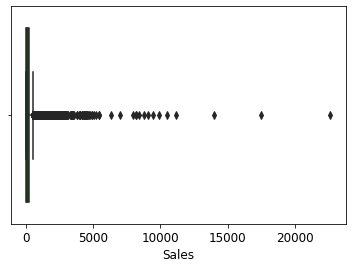

In [69]:
# Lets check the outliers for every features using boxplots.
sns.boxplot(x=data["Sales"],color='green')

As we can see from the above plot outliers are present in the Sales column, We will try to remove the outliers by IQR method.

In [70]:
# Lets do the treatment for the outliers in Sales column using IQR Method.
# IQR measures the statistical dispersion of the data values in a measure of overall distribution.
for i in["Sales"]:
    q3,q1=np.percentile(data.loc[:,i],[75,25])
    iqr=q3-q1
    max=q3+(1.5*iqr)
    min=q1-(1.5*iqr)
    
    data.loc[data[i]<min,i]=np.nan
    data.loc[data[i]>max,i]=np.nan

In [71]:
data['Sales']

0       261.960
1           NaN
2        14.620
3           NaN
4        22.368
         ...   
9989     25.248
9990     91.960
9991    258.576
9992     29.600
9993    243.160
Name: Sales, Length: 9994, dtype: float64

In [72]:
# Lets replace the nan values with the average values in Sales column.

data["Sales"].fillna(data["Sales"].mean(),inplace=True)

In [73]:
data['Sales']

0       261.960000
1        92.864853
2        14.620000
3        92.864853
4        22.368000
           ...    
9989     25.248000
9990     91.960000
9991    258.576000
9992     29.600000
9993    243.160000
Name: Sales, Length: 9994, dtype: float64

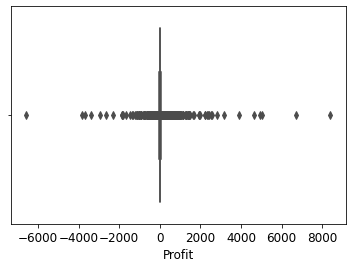

In [74]:
# Lets check outliers in Profit column
sns.boxplot(x=data['Profit'],color='Red')

Yes Profit colums also having the outliers in to it. Lets make treatment for that also.

In [75]:
for i in ['Profit']:
    q3, q1 = np.percentile(data.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
        
    data.loc[data[i] < min, i] = np.nan
    data.loc[data[i] > max, i] = np.nan

In [76]:
# Lets replace the nan values with the average values in Profit column.

data['Profit'].fillna(data['Profit'].mean(), inplace = True)

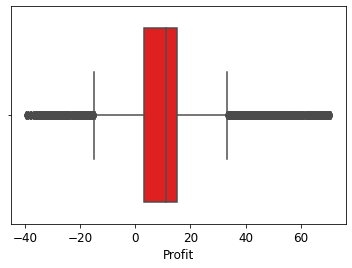

In [77]:
#Lets makesure if outliers are removed or not.
sns.boxplot(x = data['Profit'],color="Red")

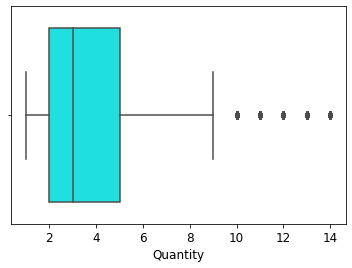

In [78]:
# Lets check outliers in Quantity Column.
sns.boxplot(x = data['Quantity'],color='cyan')

Yes, Quantity column also have outliers in to it

In [79]:
for i in ['Quantity']:
    q3, q1 = np.percentile(data.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    data.loc[data[i] < min, i] = np.nan
    data.loc[data[i] > max, i] = np.nan

In [80]:
data['Quantity'].fillna(data['Quantity'].mean(), inplace = True)

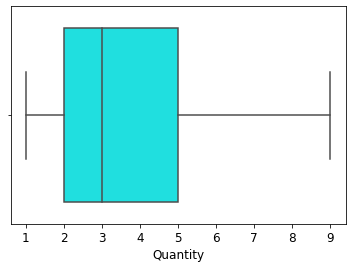

In [81]:
sns.boxplot(x = data['Quantity'],color="cyan")

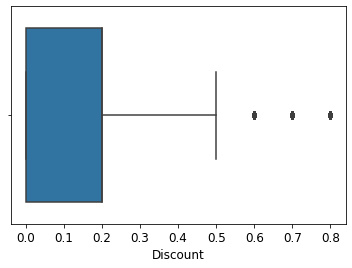

In [82]:
sns.boxplot(x = data['Discount'])

In [83]:
for i in ['Discount']:
    q3, q1 = np.percentile(data.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    data.loc[data[i] < min, i] = np.nan
    data.loc[data[i] > max, i] = np.nan

In [84]:
data['Discount'].fillna(data['Discount'].mean(), inplace = True)

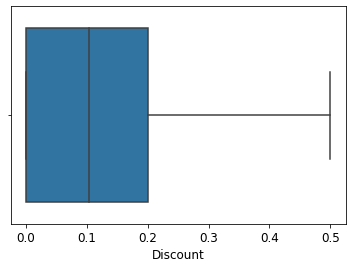

In [85]:
sns.boxplot(x = data['Discount'])

We have sucessfully removed all of the outliers from the above columns.

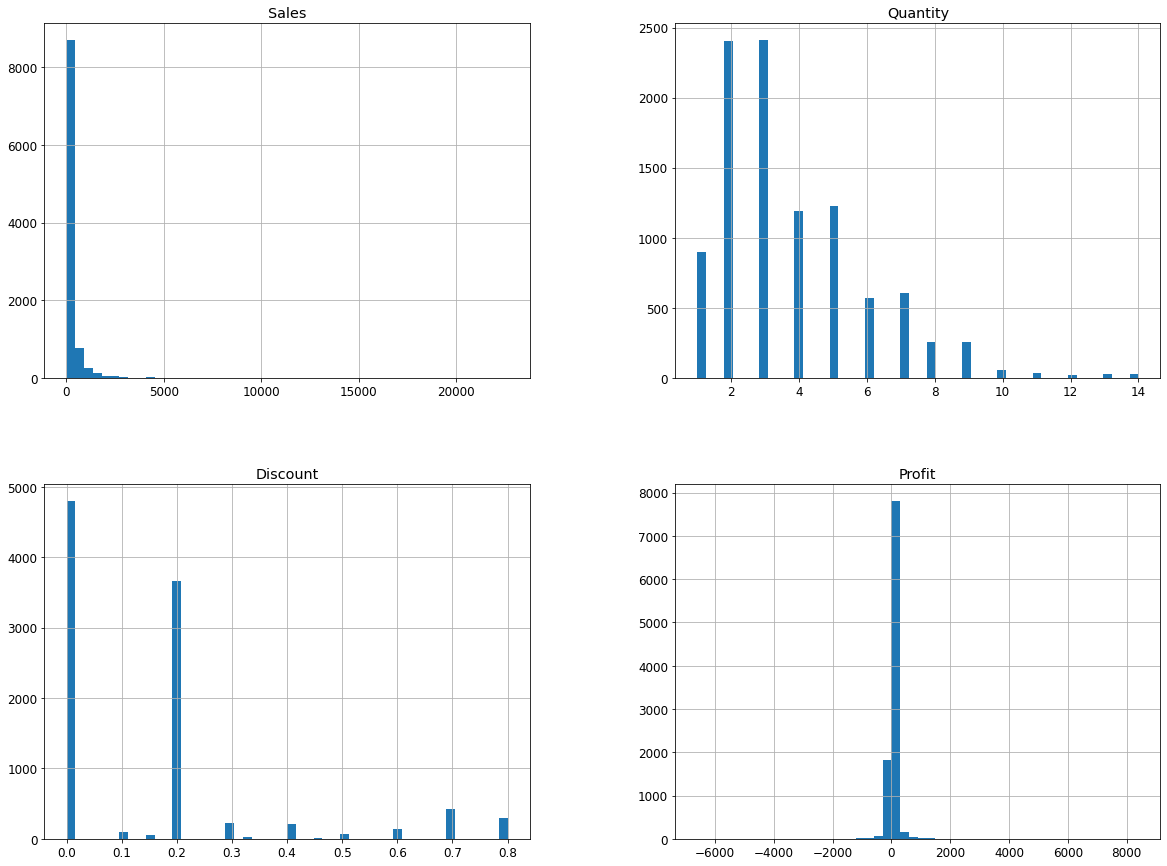

In [86]:
data1.hist(bins=50 ,figsize=(20,15))
plt.show();

#Sales distribution according to States

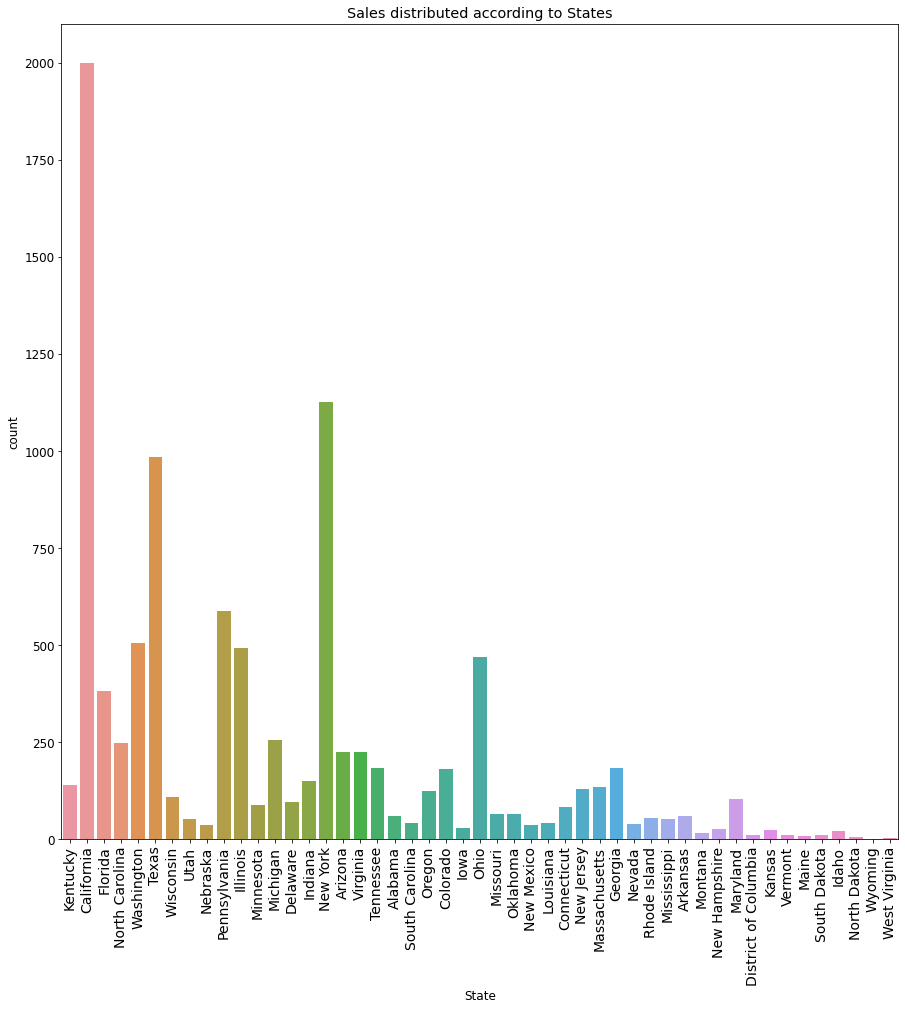

In [87]:
plt.figure(figsize=(15,15))
sns.countplot(x='State',data=data)
plt.xticks(rotation=90,fontsize=14)
plt.title('Sales distributed according to States')
plt.show()

#Sales distribution according to Ship Mode

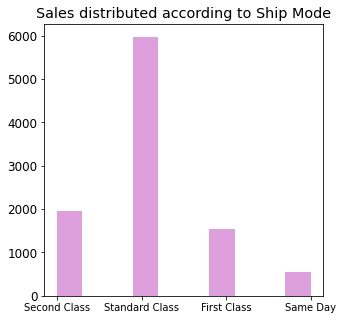

In [88]:
plt.figure(figsize=(5,5))
plt.hist(data['Ship Mode'],color='plum')
plt.xticks(fontsize=10)
plt.title('Sales distributed according to Ship Mode')
plt.show()

#Sales distribution according to Categories

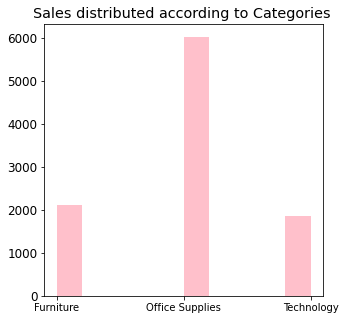

In [89]:
plt.figure(figsize=(5,5))
plt.hist(data['Category'],color='pink')
plt.xticks(fontsize=10)
plt.title('Sales distributed according to Categories ')
plt.show()

#Sales distribution according to Sub-Category

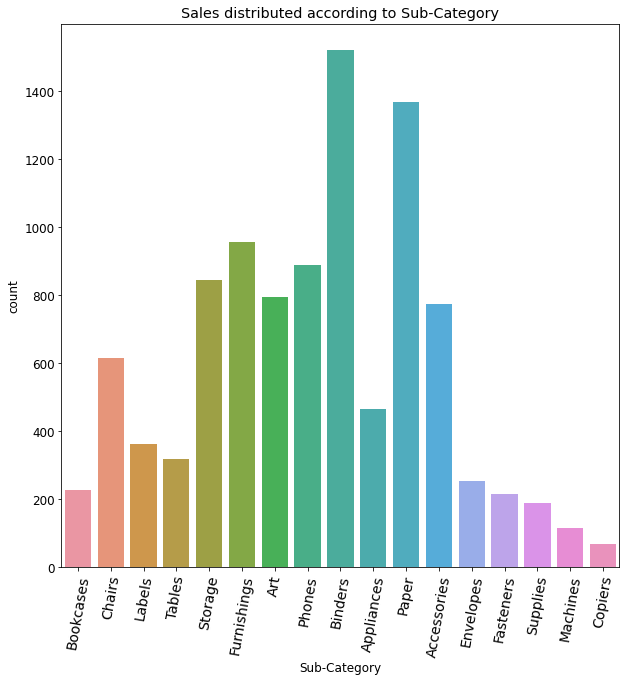

In [90]:
plt.figure(figsize=(10,10))
sns.countplot(x='Sub-Category',data=data)
plt.xticks(rotation=80,fontsize=14)
plt.title('Sales distributed according to Sub-Category')
plt.show()

In [91]:
a=data[['Category','Sub-Category','Quantity']].sort_values(by=['Quantity'],ascending=False)
a

,Category,Sub-Category,Quantity
7022,Technology,Phones,9.0
9680,Technology,Phones,9.0
1220,Office Supplies,Storage,9.0
9143,Technology,Phones,9.0
7942,Office Supplies,Binders,9.0
...,...,...,...
3618,Technology,Phones,1.0
8676,Furniture,Furnishings,1.0
7346,Office Supplies,Art,1.0
3627,Technology,Accessories,1.0


Text(0.5, 1.0, 'Category vs Sales')

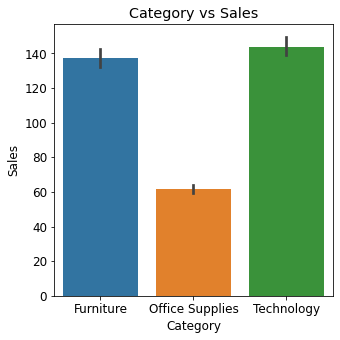

In [92]:
plt.figure(1, figsize=(5,5))
sns.barplot(x = 'Category', y='Sales', data=data)
plt.title('Category vs Sales')

Text(0.5, 1.0, 'Category vs Profit')

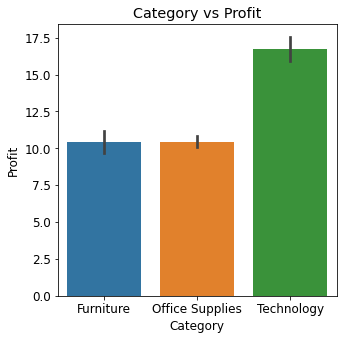

In [93]:
plt.figure(1, figsize=(5,5))
sns.barplot(x = 'Category', y='Profit', data=data)
plt.title('Category vs Profit')

Text(0.5, 1.0, 'Region vs Sales')

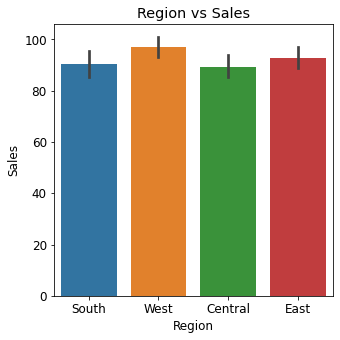

In [94]:
plt.figure(1, figsize=(5,5))
sns.barplot(x = 'Region', y='Sales', data=data)
plt.title('Region vs Sales')

Text(0.5, 1.0, 'Region vs Profit')

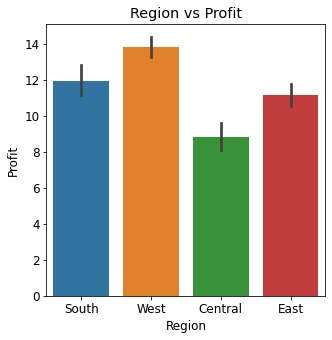

In [95]:
plt.figure(1, figsize=(5,5))
sns.barplot(x = 'Region', y='Profit', data=data)
plt.title('Region vs Profit')

In [96]:
import random
import matplotlib.colors as mcolors

#States Per Profits

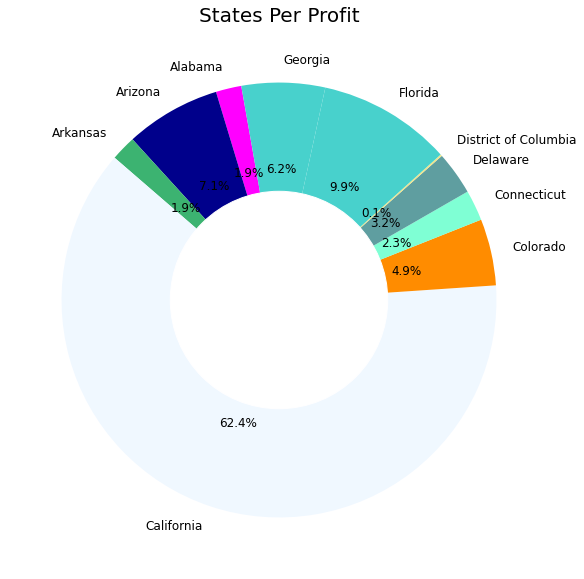

In [97]:
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 10)
d = data.groupby("State")["Sales"].sum().head(10)
plt.figure(figsize=(10,10))
plt.pie(d, labels=d.index, colors=colors,autopct='%1.1f%%',startangle=100)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("States Per Profit", fontsize=20)
plt.show()

#Profit per Category

In [98]:
Cat=pd.DataFrame()
Cat['Category']=data['Category']
Cat['Profit']=data.groupby('Category')['Profit'].transform('sum')
Cat.drop_duplicates(inplace=True)
Cat

,Category,Profit
0,Furniture,22125.924713
2,Office Supplies,62999.010800
7,Technology,30846.299826


#Profit per Sub-Category

In [99]:
Sub_cat=pd.DataFrame()
Sub_cat['Sub-Category']=data['Sub-Category']
Sub_cat['Profit']=data.groupby('Sub-Category')['Profit'].transform('sum')
Sub_cat.drop_duplicates(inplace=True)
Sub_cat

,Sub-Category,Profit
0,Bookcases,2334.805683
1,Chairs,5911.135247
2,Labels,3756.426846
3,Tables,2821.675685
4,Storage,8685.248914
5,Furnishings,11058.308099
6,Art,5816.174374
7,Phones,14945.508000
8,Binders,9607.819071
9,Appliances,7671.869380


#Areas with lowest Profit

In [100]:
Areas=pd.DataFrame()
Areas['Region']=data['Region']

In [101]:
#Sum of profit per Region
Areas['Profit']=data.groupby('Region')['Profit'].transform('sum')
#removing the repetitive rows 
Areas.drop_duplicates(inplace=True)
Areas

,Region,Profit
0,South,19365.213426
2,West,44367.785963
14,Central,20522.329959
23,East,31715.905991


In [102]:
#Column city in areas contains each city  (  unique value in each row )
Areas=pd.DataFrame()
Areas['City']=data['City']

In [103]:
#Sum of profit per City
Areas['Profit']=data.groupby('City')['Profit'].transform('sum')
#removing the repetitive rows 
Areas.drop_duplicates(inplace=True)
Areas.head(10)

,City,Profit
0,Henderson,827.294404
2,Los Angeles,11283.317542
3,Fort Lauderdale,105.226230
12,Concord,517.468616
13,Seattle,6676.943961
14,Fort Worth,92.472160
16,Madison,167.851772
17,West Jordan,102.672300
18,San Francisco,7201.266707
21,Fremont,179.469600


In [104]:
#Cities with  highest negatif income (loss) to the lowest
loss_area=Areas[Areas['Profit']<0].sort_values(by=['Profit'],ascending=True)
loss_area.head(10)

,City,Profit
9223,Bryan,-58.676514
2171,San Angelo,-58.553200
3016,Pharr,-53.215914
2787,Corpus Christi,-43.730400
1642,Skokie,-42.278714
1566,Allen,-39.877500
2145,York,-39.694714
6603,Commerce City,-32.929200
900,Garland,-32.373000
4916,League City,-31.349900


In [105]:
loss_area['City'].unique()

array(['Bryan', 'San Angelo', 'Pharr', 'Corpus Christi', 'Skokie',
       'Allen', 'York', 'Commerce City', 'Garland', 'League City',
       'Greensboro', 'Beaumont', 'Grand Prairie', 'Pueblo', 'Boca Raton',
       'San Marcos', 'Frisco', 'Romeoville', 'Wilson', 'Cuyahoga Falls',
       'Sanford', 'Peoria', 'Deer Park', 'Missouri City', 'Hamilton',
       'Tinley Park', 'Reading', 'Woodstock', 'Medina', 'Bolingbrook',
       'Mason', 'Irving', 'Abilene', 'Lubbock', 'Ormond Beach', 'Odessa',
       'Pensacola', 'Elyria', 'Altoona', 'Hickory', 'Broomfield', 'Tempe',
       'Fort Collins'], dtype=object)

In [106]:
print('There are {} weak Cities in diffrent States needs to be treated'.format(loss_area.shape[0]) )

There are 43 weak Cities in diffrent States needs to be treated


#Pairplot as Segment

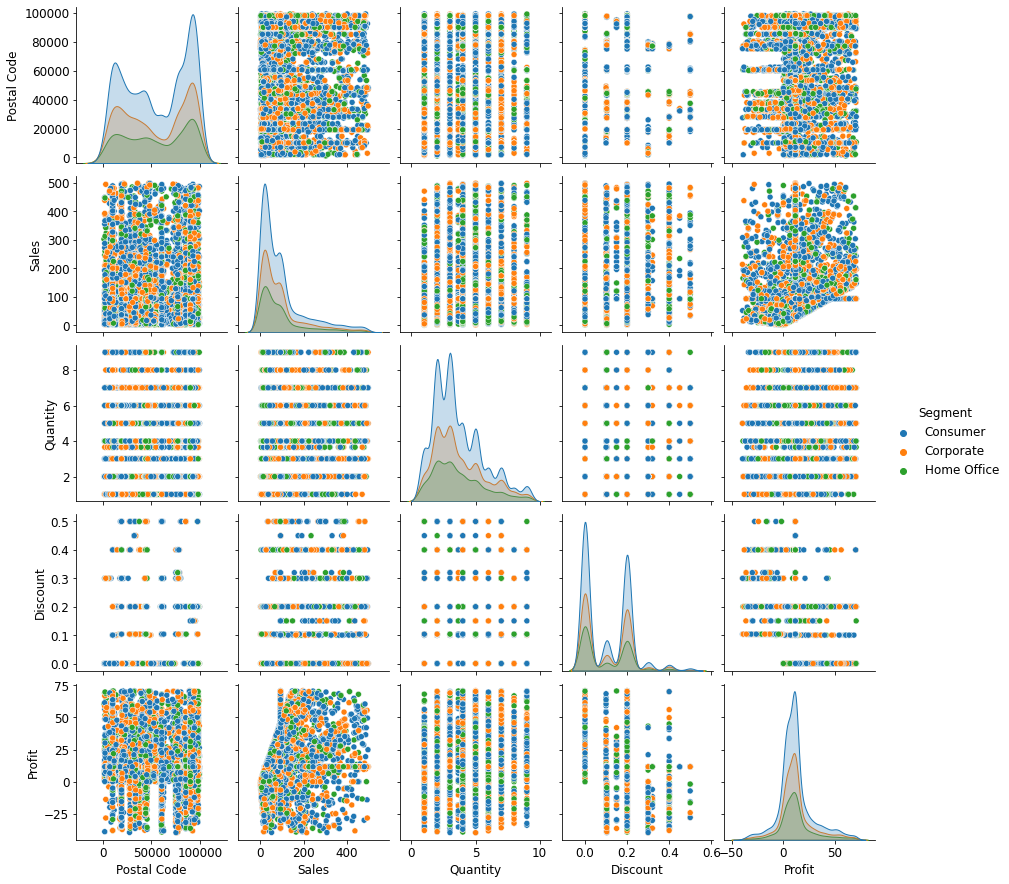

In [107]:
sns.pairplot(data=data , hue='Segment')

#Analyse profits category

In [108]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

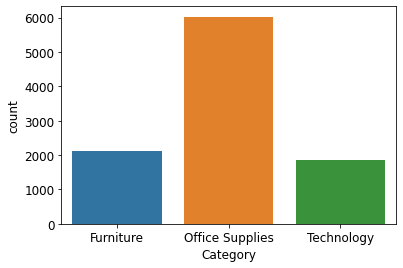

In [109]:
sns.countplot(x='Category',data=data)

In [110]:
#Mean
ss_Category_MeanProfit = data.groupby('Category')['Profit'].mean()
ss_Category_MeanProfit

Category
Furniture          10.431836
Office Supplies    10.454532
Technology         16.700758
Name: Profit, dtype: float64

In [111]:
#sum
ss_Category_SumProfit = data.groupby('Category')['Profit'].sum()
ss_Category_SumProfit

Category
Furniture          22125.924713
Office Supplies    62999.010800
Technology         30846.299826
Name: Profit, dtype: float64

#Analyse profit based on Ship Mode

In [112]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

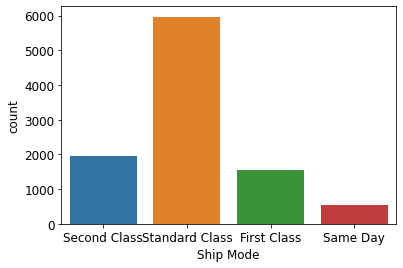

In [113]:
sns.countplot(x='Ship Mode',data=data)

In [114]:
#sum
ss_Shipmode_SumProfit = data.groupby('Ship Mode')['Profit'].sum()
ss_Shipmode_SumProfit

Ship Mode
First Class       17514.231804
Same Day           5905.976458
Second Class      23438.189574
Standard Class    69112.837502
Name: Profit, dtype: float64

In [115]:
#Mean
ss_Shipmode_MeanProfit = data.groupby('Ship Mode')['Profit'].mean()
ss_Shipmode_MeanProfit

Ship Mode
First Class       11.387667
Same Day          10.876568
Second Class      12.050483
Standard Class    11.580569
Name: Profit, dtype: float64

#Thank you 😍